# Use Case
### Use Case Summary
#### Objective Statement:
- To analyze the monthly and yearly grand totals to identify trends and patterns.
- To segment customers using the RFM model to identify high-value customers.
- To develop marketing strategies to target high-value customers and increase revenue.

#### Challenges:
- The dataset is large and has different data types.
- It is difficult to get the frequency of customer purchases using the Groupby method.

#### Methodology / Analytic Technique:
- Exploratory data analysis (EDA) will be used to identify trends and patterns in the data.
- A clustering model will be used to segment customers into different groups based on the RFM model.
- Segment analysis will be used to develop marketing strategies to target high-value customers.

#### Business Benefit:
- The business will be able to better understand its customers and their needs.
- The business will be able to develop more effective marketing strategies to target high-value customers.
- The business will be able to increase revenue by targeting high-value customers.

#### Expected Outcome:
- The business will know the grand total in each year.
- The business will know the grand total per month in each year and the month with the highest and lowest grand total in each year.
- The business will know the comparison of the grand total between each year and the month with the most significant decrease and increase in each year.
- The business will be able to segment customers using the RFM model.
- The business will know how to optimize marketing strategies to the right customers to generate more revenue.

# Business Understanding
Retail is the process of selling consumer goods or services to customers through multiple channels of distribution to earn a profit. In this case, we are interested in understanding the monthly and yearly grand totals of a retail business. We also want to segment customers using the RFM model and develop marketing strategies to target high-value customers.

This case requires data-driven answers to the following questions:
- How much is the grand total in each year? (This question will help us to understand the overall sales of the retail business over time.)
- How much is the grand total per month in each year and which month has the highest and lowest grand total in each year? (This question will help us to identify the months that are typically the busiest and slowest for the retail business.)
- How is the comparison of the grand total between each year and which month has the most significant decrease and increase in each year? (This question will help us to understand how the retail business is performing over time and which months are seeing the most significant changes in sales.)
- How is the customer segmentation using RFM model? (This question will help us to identify different groups of customers based on their recency, frequency, and monetary value.)
- How to optimize marketing strategies to the right customers to generate more revenue? (This question will help us to develop marketing strategies that are targeted to high-value customers.)


# Data Understanding
* The data set contains information about retail transactions from 4 January 2011 to 31 December 2014.
* The dataset has 4 columns and 5009 rows.

#### Data Source
* Source Data: https://www.kaggle.com/datasets/siddinho/sample-orders-dataset-retail    

#### Data Dictionary 
* Order Date 	: Transaction date
* Order Id		: Order code of each transaction
* Customer		: Customer's name
* Grand Total	: Total customer spending

# Data Preparation
Code Used :
* Python Version :Python 3.8.8
* Packages : Pandas, Numpy, Matplotlib, Seaborn, SKlearn,  Datetime, Plotly, Feature Engine, Warnings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

import feature_engine
from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings("ignore")

# Data Profiling

Read the data from the CSV file data_orders.csv into a DataFrame variable called df

In [ ]:
df = pd.read_csv('data_orders.csv')

In [ ]:
df.head()

,order_date,order_id,customer,grand_total
0,9/7/2011,CA-2011-100006,Dennis Kane,378
1,7/8/2011,CA-2011-100090,Ed Braxton,699
2,3/14/2011,CA-2011-100293,Neil Franzšsisch,91
3,1/29/2011,CA-2011-100328,Jasper Cacioppo,4
4,4/8/2011,CA-2011-100363,Jim Mitchum,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


In [ ]:
df.nunique()

order_date     1238
order_id       5009
customer        793
grand_total    1358
dtype: int64

In [ ]:
print(df.isnull().sum())

order_date     0
order_id       0
customer       0
grand_total    0
dtype: int64


The is no null value in this dataset

In [ ]:
df.describe()

,grand_total
count,5009.000000
mean,458.626672
std,954.729307
min,1.000000
25%,38.000000
50%,152.000000
75%,512.000000
max,23661.000000


The dataset contains 5,009 rows of data, each with a grand total amount. The average grand total is 458.6, meaning that most transactions are around this amount. The minimum grand total is 1, and the maximum is 23,661. This shows that there is a wide range of transaction sizes in the dataset.



# Data Cleaning

#### Change the data type of the order_date column from object to datetime

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

#### Create a new column that takes only the year and month from the order_date column

In [ ]:
df['date'] = df['order_date'].dt.strftime('%Y-%m')

In [ ]:
df.head()

,order_date,order_id,customer,grand_total,date
0,2011-09-07,CA-2011-100006,Dennis Kane,378,2011-09
1,2011-07-08,CA-2011-100090,Ed Braxton,699,2011-07
2,2011-03-14,CA-2011-100293,Neil Franzšsisch,91,2011-03
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4,2011-01
4,2011-04-08,CA-2011-100363,Jim Mitchum,21,2011-04


The new column "date" has been added

# Exploratory Data Analysis

In [ ]:
# make function that shows percentage of data
def show_percent(data, values):
    data["percent"] = round(data[values]*100/data[values].sum(),1)
    print(data)

In [ ]:
# make function that returns percentage of data
def get_percent(data, values):
    data = round(data[values]*100/data[values].sum(),1)
    return data

* #### group data by month

The code below groups the df DataFrame by the date column and then sums the grand_total column for each group. This creates a new DataFrame called df_agg that contains the date and the total grand total for each day.

The code then converts the date column to the datetime dtype. This is necessary because the groupby() method requires the grouping columns to be of the datetime dtype.


In [ ]:
df_agg = df.groupby('date').grand_total.sum()
df_agg = pd.DataFrame(df_agg)
df_agg = df_agg.reset_index()
df_agg['date'] = pd.to_datetime(df_agg['date'])
df_agg.head()

,date,grand_total
0,2011-01-01,13949
1,2011-02-01,4810
2,2011-03-01,55695
3,2011-04-01,28298
4,2011-05-01,23647


In [ ]:
df_2011 = df_agg[df_agg['date'].dt.year == 2011]
df_2012 = df_agg[df_agg['date'].dt.year == 2012]
df_2013 = df_agg[df_agg['date'].dt.year == 2013]
df_2014 = df_agg[df_agg['date'].dt.year == 2014]

         date  grand_total  percent
0  2011-01-01        13949      2.9
1  2011-02-01         4810      1.0
2  2011-03-01        55695     11.5
3  2011-04-01        28298      5.8
4  2011-05-01        23647      4.9
5  2011-06-01        34593      7.1
6  2011-07-01        33945      7.0
7  2011-08-01        27910      5.8
8  2011-09-01        81784     16.9
9  2011-10-01        31449      6.5
10 2011-11-01        78633     16.2
11 2011-12-01        69547     14.4


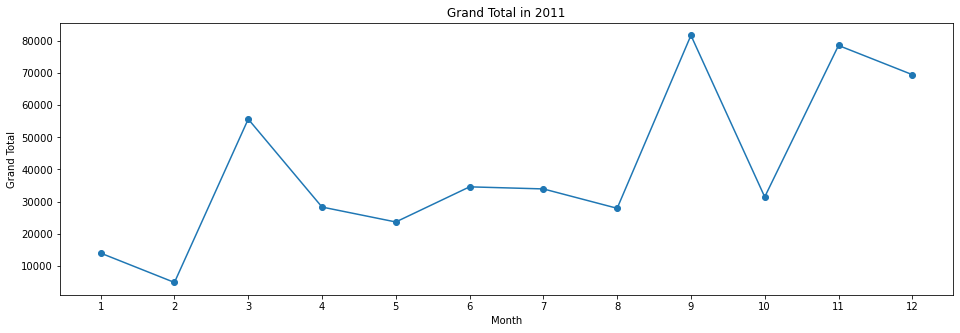

In [ ]:
show_percent(data=df_2011 ,values="grand_total")

plt.figure(figsize=(16,5))
plt.title('Grand Total in 2011')
plt.plot(df_2011.date.dt.month, df_2011.grand_total, marker='o')
plt.xticks(df_2011.date.dt.month)
plt.ylabel('Grand Total')
plt.xlabel('Month')
plt.show()

The graph shows the total sales for each month of the year 2011. **February had the lowest total sales of 1%**, while **September had the highest total sales of 16.9%**.

There were a few significant changes in total sales throughout the year. From January to February, there was a decrease of 1.9%. From February to March, there was a significant increase of 10.5%. From March to April, there was a decrease of 5.7%. From April to August, there was no significant change in total sales. From August to September, there was an increase of 11.1%. From September to October, there was a large decrease of 10%. From October to November, there was an increase of 9.7%. And in November, the total sales for the year closed at 14.4%.

**September was the month that experienced the biggest increase in total sales of 11.1%**. **October was the month that experienced the biggest decrease in total sales of 10.4%**.

         date  grand_total  percent
12 2012-01-01        18174      3.9
13 2012-02-01        12211      2.6
14 2012-03-01        38469      8.2
15 2012-04-01        34196      7.3
16 2012-05-01        30137      6.4
17 2012-06-01        24800      5.3
18 2012-07-01        28767      6.1
19 2012-08-01        36898      7.8
20 2012-09-01        64595     13.7
21 2012-10-01        31406      6.7
22 2012-11-01        75968     16.1
23 2012-12-01        74918     15.9


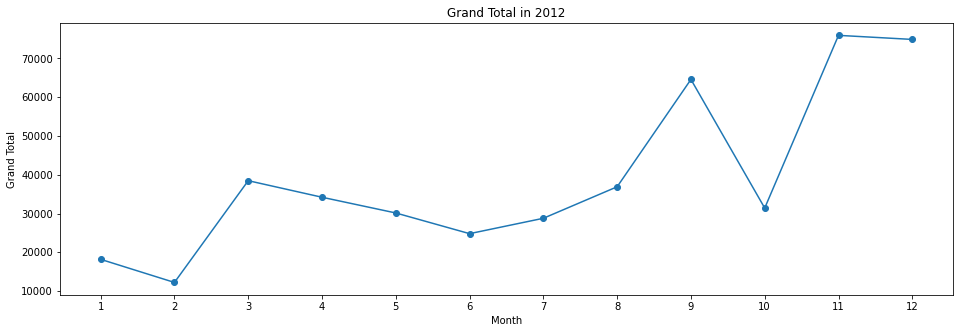

In [ ]:
show_percent(data=df_2012 ,values="grand_total")

plt.figure(figsize=(16,5))
plt.title('Grand Total in 2012')
plt.plot(df_2012.date.dt.month, df_2012.grand_total, marker='o')
plt.xticks(df_2012.date.dt.month)
plt.ylabel('Grand Total')
plt.xlabel('Month')
plt.show()

The graph shows the grand total for each month of the year 2012. **February had the lowest grand total of 2.6%**, while **November had the highest grand total of 16.1%**.

There were a few significant changes in grand total throughout the year. In January 2012, the grand total was higher than in January 2011 to 3.9%. February had the lowest grand total of 2.6%. March experienced a significant increase to 8.2%, and April had a slight decrease to 7.3%. May and June had further decreases to 6.4% and 5.3%, respectively. In July, the grand total increased again to 6.1%. August had an increase to 7.8%, and September had a significant increase to 13.7%. October had a significant decrease to 6.7%. The end of the year had very high grand totals, with November at 16.1% and December at 15.9%.

**October was the month that experienced the biggest increase in grand total of 9.4%**, from 6.7% in September to 16.1% in October. **October was also the month that experienced the biggest decrease in grand total of 7%**, from 13.7% in September to 6.7% in October.

         date  grand_total  percent
24 2013-01-01        18543      3.0
25 2013-02-01        22867      3.8
26 2013-03-01        51185      8.4
27 2013-04-01        39251      6.5
28 2013-05-01        56693      9.3
29 2013-06-01        39431      6.5
30 2013-07-01        38440      6.3
31 2013-08-01        33261      5.5
32 2013-09-01        72909     12.0
33 2013-10-01        56463      9.3
34 2013-11-01        82190     13.5
35 2013-12-01        97244     16.0


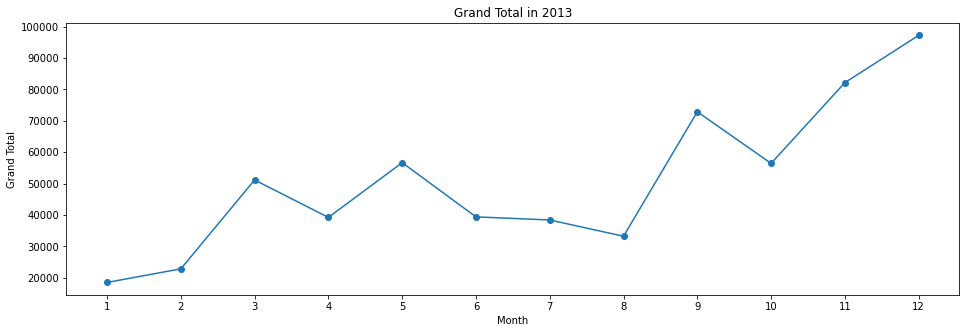

In [ ]:
show_percent(data=df_2013 ,values="grand_total")

plt.figure(figsize=(16,5))
plt.title('Grand Total in 2013')
plt.plot(df_2013.date.dt.month, df_2013.grand_total, marker='o')
plt.xticks(df_2013.date.dt.month)
plt.ylabel('Grand Total')
plt.xlabel('Month')
plt.show()

The graph shows the grand total for each month of the year 2013. **January had the lowest grand total of 3%**, while **December had the highest grand total of 16%**.

There were a few significant changes in grand total throughout the year. January started with a relatively low grand total of 3%. In February, it increased to 3.8%, and in March it increased to 8.4%. April had a decrease to 6.5%, and May had an increase to 9.3%. June had a decrease to 6.5%. The highest grand total in the first half of the year was in May with 9.3%.

Entering the second half of 2013, the grand total for July and August did not differ significantly, with 6.3% and 5.5%, respectively. In September, there was a significant increase in the grand total of up to 12%. Sales tend to increase at the end of the year, with 14% in November and 16% in December.

**September was the month that experienced the biggest increase in grand total of 6.5%**, from 5.5% in August to 12% in September. **June was the month that experienced the biggest decrease in grand total of 2.8%**, from 9.3% in May to 6.5% in June.

         date  grand_total  percent
36 2014-01-01        44708      6.1
37 2014-02-01        20287      2.8
38 2014-03-01        53917      7.3
39 2014-04-01        40110      5.5
40 2014-05-01        45655      6.2
41 2014-06-01        48256      6.6
42 2014-07-01        48429      6.6
43 2014-08-01        61517      8.4
44 2014-09-01        90495     12.3
45 2014-10-01        77802     10.6
46 2014-11-01       112329     15.3
47 2014-12-01        90480     12.3


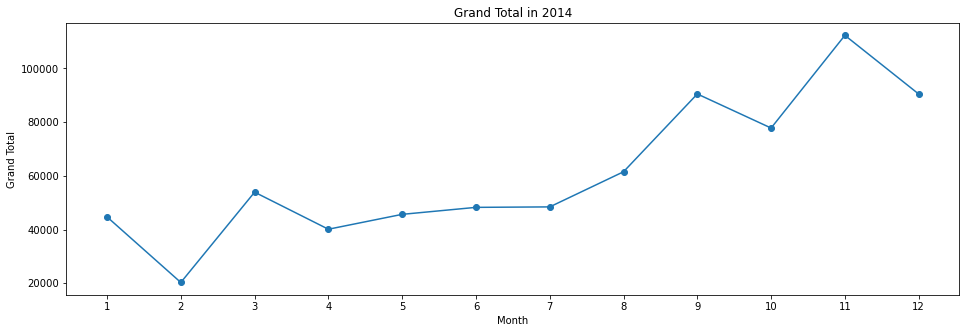

In [ ]:
show_percent(data=df_2014 ,values="grand_total")

plt.figure(figsize=(16,5))
plt.title('Grand Total in 2014')
plt.plot(df_2014.date.dt.month, df_2014.grand_total, marker='o')
plt.xticks(df_2014.date.dt.month)
plt.ylabel('Grand Total')
plt.xlabel('Month')
plt.show()

The graph shows the grand total for each month of the year 2014. **February had the lowest grand total of 2.8%**, while **November had the highest grand total of 15.3%**.

There were a few significant changes in grand total throughout the year. January started with a grand total of 6.1%, which was higher than the previous year. February had a decrease to 2.8%, and March had a significant increase to 7.3%. April had a gradual increase in grand total to 5.5%, followed by a further increase to 6.2% in May and 6.6% in June. The grand total was stagnant at 6.6% from June to July. August had an increase in grand total to 8.4%, followed by an increase to 12.3% in September. October had a decrease in grand total to 10.6%, before November had a significant increase to 15.3%. December had a decrease in grand total to 12.3%.

**November was the month that experienced the largest increase in grand total of 4.7%**, from 10.6% in October to 15.3% in November. **February was the month that experienced the biggest decrease in grand total of 3.3%**, from 6.1% in January to 2.8% in February.

* #### group data by year

The code below groups the df DataFrame by the year of the order_date column. Then, it sums the grand_total column for each group. This creates a new DataFrame called df_year that contains the year and the total grand total for each year.

In [ ]:
df_year = df.groupby(df.order_date.dt.year).grand_total.sum()
df_year = pd.DataFrame(df_year)
df_year = df_year.reset_index()
df_year.head()

,order_date,grand_total
0,2011,484260
1,2012,470539
2,2013,608477
3,2014,733985


   order_date  grand_total  percent
0        2011       484260     21.1
1        2012       470539     20.5
2        2013       608477     26.5
3        2014       733985     32.0


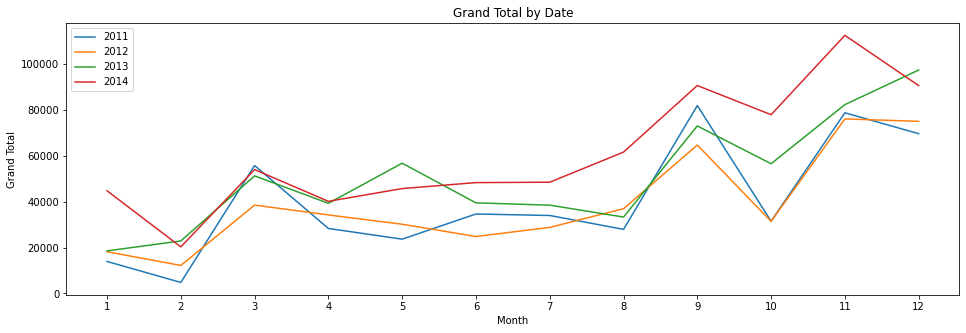

In [ ]:
show_percent(data=df_year ,values="grand_total")

plt.figure(figsize=(16,5))
plt.title('Grand Total by Date')
plt.plot(df_2011.date.dt.month, df_2011.grand_total, label='2011')
plt.plot(df_2012.date.dt.month, df_2012.grand_total, label='2012')
plt.plot(df_2013.date.dt.month, df_2013.grand_total, label='2013')
plt.plot(df_2014.date.dt.month, df_2014.grand_total, label='2014')
plt.xticks(df_2014.date.dt.month)
plt.legend(loc='upper left')
plt.ylabel('Grand Total')
plt.xlabel('Month')
plt.show()

The graph shows the total monthly income for each year. **2014 had the highest total income every month**. There are several patterns that are similar in each year:

* From February to March, there is an increase in total income.
* From August to September, there is also an increase in total income, but from September to October, there is a decrease.
* In October to November, there is an increase in total income.
* It is estimated that the increase in total income in November is due to the Black Friday event, which is held every year.

The green line (2013) is slightly different from the other years at the beginning and end of the year. In 2013, there was an increase in income from January to February, and from October to December.

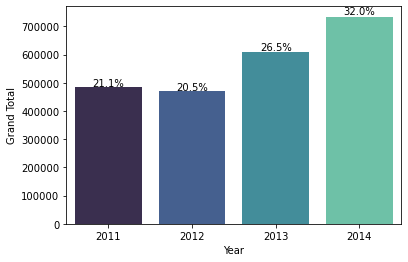

In [ ]:
percentage = get_percent(data=df_year ,values="grand_total")

ax = sns.barplot(data = df_year, palette = 'mako', x= 'order_date' , y = 'grand_total')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()*1.01
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

plt.xlabel('Year')
plt.ylabel('Grand Total')
plt.show()

The chart shows the grand total for each year. **The lowest grand total was in 2012 at 20.5%**, while **the highest grand total was in 2014 at 32%**.

There was a decrease in total sales in 2012 from 0.6% in 2011. However, there was an increase in total sales in 2013 and 2014.

In 2011, the grand total was 21%. In 2012, total sales decreased by 0.6% to 20%. In 2013, the grand total increased by 5.1% to 26.5%. In 2014, the grand total increased by 5.5% to 32%.

# Preprocessing Modeling
# RFM Analysis
RFM analysis is basically scoring our customers based on their Recency, Frequency and Monetary values.

Recency : How long it’s been since a customer bought something from us.

Frequency : How often a customer buys from us.

Monetary : The total value of purchases a customer has made

In [ ]:
print(df["order_date"].min())
print(df["order_date"].max())
print("The data is from a 4-year transaction")

2011-01-04 00:00:00
2014-12-31 00:00:00
The data is from a 4-year transaction


In [ ]:
NOW = dt.date(2014,12,31) 
df['date'] = pd.DatetimeIndex(df.order_date).date

The code below groups the df DataFrame by the customer column, takes the maximum value of the date column for each group, creates a new column called Recency that contains the number of days since the last purchase for each customer, and drops the Last_Purchase_Date column.

In [ ]:
df_recency = df.groupby(['customer'], as_index = False)['date'].max()
df_recency.columns = ['customer', 'Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x: (NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'], inplace = True)
df_recency.head()

,customer,Recency
0,Aaron Bergman,415
1,Aaron Hawkins,12
2,Aaron Smayling,88
3,Adam Bellavance,54
4,Adam Hart,34


The code below groups the df DataFrame by the customer column, calculates two new columns called Frequency and Monetary, and renames the columns.

In [ ]:
FM_Table = df.groupby('customer').agg({'order_id': lambda x:len(x),
                                        'grand_total' : lambda x: x.sum()})

FM_Table.rename(columns = {'order_id' : 'Frequency',
                          'grand_total' : 'Monetary'}, inplace=True)

FM_Table.head()

,Frequency,Monetary
customer,,
Aaron Bergman,3,887
Aaron Hawkins,7,1744
Aaron Smayling,7,3050
Adam Bellavance,8,7756
Adam Hart,10,3249


The code below merges the df_recency DataFrame and the FM_Table DataFrame on the customer column. This creates a new DataFrame called RFM_Table that contains all of the data from both DataFrames.

In [ ]:
RFM_Table = df_recency.merge(FM_Table, left_on='customer', right_on='customer')

RFM_Table.head()

,customer,Recency,Frequency,Monetary
0,Aaron Bergman,415,3,887
1,Aaron Hawkins,12,7,1744
2,Aaron Smayling,88,7,3050
3,Adam Bellavance,54,8,7756
4,Adam Hart,34,10,3249


In [ ]:
quantiles = RFM_Table.quantile(q = [0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

This code first calculates the quantiles for each column in the RFM_Table DataFrame. The quantiles are calculated at three different levels:

* 25%: The lower quartile.
* 50%: The median.
* 75%: The upper quartile.

The code then converts the quantiles to a dictionary. The dictionary has the following keys:
* Recency: The quantiles for the Recency column.
* Frequency: The quantiles for the Frequency column.
* Monetary: The quantiles for the Monetary column.

The code below copies the RFM_Table DataFrame to a new DataFrame called segmented_rfm. This is done so that the original DataFrame can be preserved.

In [ ]:
segmented_rfm = RFM_Table.copy()

The code below are used to assign RFM scores to each customer in the segmented_rfm DataFrame. The RScore() function calculates the RFM score for the Recency column, and the FMScore() function calculates the RFM score for the Frequency and Monetary columns.

The RScore() function takes three arguments:

* x: The value of the Recency column for the customer.
* p: The name of the Recency column.
* d: The dictionary of quantiles.

The function first checks if the value of x is less than or equal to the lower quartile of the Recency column. If it is, the function returns a score of 1. If the value of x is greater than the lower quartile but less than or equal to the median, the function returns a score of 2. If the value of x is greater than the median but less than or equal to the upper quartile, the function returns a score of 3. Otherwise, the function returns a score of 4.

The FMScore() function takes three arguments:

* x: The value of the Frequency or Monetary column for the customer.
* p: The name of the Frequency or Monetary column.
* d: The dictionary of quantiles.

The function first checks if the value of x is less than or equal to the lower quartile of the Frequency or Monetary column. If it is, the function returns a score of 4. If the value of x is greater than the lower quartile but less than or equal to the median, the function returns a score of 3. If the value of x is greater than the median but less than or equal to the upper quartile, the function returns a score of 2. Otherwise, the function returns a score of 1.

In [ ]:
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

To score each column of Recency, Frequency, and Monetary, we first determine a score range from 1 to 4. The highest score is 1 and the lowest score is 4.

* Recency: This column measures how recently a customer has made a purchase. A score of 1 means the customer has made a purchase recently, and a score of 4 means the customer has not made a purchase in a long time.
* Frequency: This column measures how often a customer makes purchases. A score of 1 means the customer makes purchases very often, and a score of 4 means the customer makes purchases very rarely.
* Monetary: This column measures the total amount of money a customer has spent. A score of 1 means the customer has spent a lot of money, and a score of 4 means the customer has spent very little money.

Once we have determined the score range for each column, we can assign a score to each customer. The score for each column is determined by comparing the customer's value in that column to the quantiles of the column. The quantiles are the values that divide the column into four equal parts.

The code below creates three new columns in the segmented_rfm DataFrame that contain the RFM scores for the Recency, Frequency, and Monetary columns. The scores are calculated using the RScore() and FMScore() functions, which take the customer's value in the column as input.

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency', quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary', quantiles))

segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,Aaron Bergman,415,3,887,4,4,4
1,Aaron Hawkins,12,7,1744,1,2,3
2,Aaron Smayling,88,7,3050,3,2,2
3,Adam Bellavance,54,8,7756,2,2,1
4,Adam Hart,34,10,3249,2,1,2


The code below creates a new column in the segmented_rfm DataFrame called RFM_Segment. This column is a concatenation of the R_quartile, F_quartile, and M_quartile columns. The map() function is used to convert the values in each column to strings before they are concatenated.


In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,Aaron Bergman,415,3,887,4,4,4,444
1,Aaron Hawkins,12,7,1744,1,2,3,123
2,Aaron Smayling,88,7,3050,3,2,2,322
3,Adam Bellavance,54,8,7756,2,2,1,221
4,Adam Hart,34,10,3249,2,1,2,212


The code below creates a new column in the segmented_rfm DataFrame called RFM_Score. This column is the sum of the R_quartile, F_quartile, and M_quartile columns. The sum() function is used to calculate the sum of the values in the three columns, and the axis=1 argument specifies that the sum should be calculated across the rows of the DataFrame. The new column is then printed to the console.

In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,Aaron Bergman,415,3,887,4,4,4,444,12
1,Aaron Hawkins,12,7,1744,1,2,3,123,6
2,Aaron Smayling,88,7,3050,3,2,2,322,7
3,Adam Bellavance,54,8,7756,2,2,1,221,5
4,Adam Hart,34,10,3249,2,1,2,212,5


# Label

In [ ]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print("Loyal Customers: ",len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print("Almost Lost: ", len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print("Lost Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print("Lost Cheap Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  30
Loyal Customers:  159
Big Spenders:  198
Almost Lost:  2
Lost Customers:  31
Lost Cheap Customers:  67


This output shows that there are 30 customers who are classified as "Best Customers". These customers have recently made a purchase, make purchases often, and spend a lot of money. There are also 160 customers who are classified as "Loyal Customers". These customers make purchases often, but they may not have recently made a purchase. There are also 198 customers who are classified as "Big Spenders". These customers spend a lot of money, but they may not make purchases very often.

**The other segments represent customers who are at risk of churning**. The "Almost Lost" segment represents customers who have recently made a purchase, but they do not make purchases often and they do not spend a lot of money. The "Lost Customers" segment represents customers who have not made a purchase in a long time, they do not make purchases often, and they do not spend a lot of money. The "Lost Cheap Customers" segment represents customers who have not made a purchase in a long time, they do not make purchases often, and they spend very little money.

The following labels are assigned:

* "Best Customers": Customers with an RFM segment of "111".
* "Almost Lost": Customers with an RFM segment of "134".
* "Lost Customers": Customers with an RFM segment of "344".
* "Lost Cheap Customers": Customers with an RFM segment of "444".
* "Loyal Customers": Customers with a "1" in the F_quartile column.
* "Big Spenders": Customers with a "1" in the M_quartile column.
* "Others": Customers who do not fall into any of the other categories.

In [ ]:
label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [ ]:
segmented_rfm['Label'] = label

In [ ]:
segmented_rfm['Label'].value_counts()

Others                  409
Loyal Customers         129
Big Spenders            125
Lost Cheap Customers     67
Lost Customers           31
Best Customers           30
Almost Lost               2
Name: Label, dtype: int64

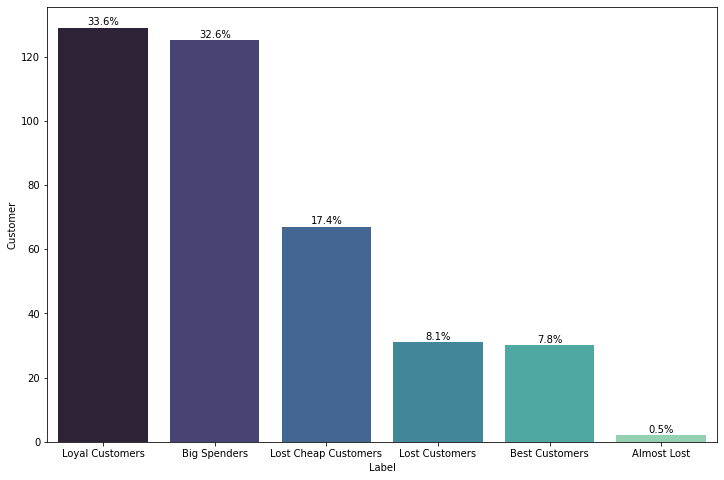

In [ ]:
sq1 = segmented_rfm.groupby('Label')['customer'].nunique().sort_values(ascending=False).reset_index()
sq1.drop([0], inplace = True)

plt.figure(figsize = (12,8))
percentage = get_percent(data=sq1 ,values="customer")

ax = sns.barplot(data = sq1, x = "Label", y = "customer", palette = "mako")
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.9
   ax.annotate('{:.1f}%'.format(percentage[i+1]), (x, y), ha='center')
plt.ylabel('Customer')
plt.show()

The chart shows the results of customer clustering, which is a process of grouping customers together based on their RFM (Recency, Frequency, Monetary) scores. The RFM scores are calculated based on how recently a customer has made a purchase, how often they make purchases, and how much money they spend.

The chart shows that the customers have been clustered into 6 categories:

* Loyal Customers: These customers make frequent purchases and have a large monetary value. They represent 33.6% of all customers.
* Big Spenders: These customers have a large monetary value, but they may not make purchases very often. They represent 32.6% of all customers.
* Lost Cheap Customers: These customers have not made a purchase in a long time, they rarely make purchases, and they do not have a large monetary value. They represent 17.4% of all customers.
* Lost Customers: These customers have not made a purchase in a long time, they rarely make purchases, and they have a low monetary value. They represent 8.1% of all customers.
* Best Customers: These customers have recently made a purchase, they make frequent purchases, and they have a large monetary value. They represent 7.8% of all customers.
* Almost Lost: These customers have recently made a purchase, they make purchases quite often, but they have a low monetary value. They represent 0.5% of all customers.

The remaining 52% of customers do not fit into any of these categories and are labeled as "Others."

# Result

- In 2011, **February had the lowest total sales of 1%**, while **September had the highest total sales of 16.9%**. **September was the month that experienced the biggest increase in total sales of 11.1%**. **October was the month that experienced the biggest decrease in total sales of 10.4%**.


- In 2012, **February had the lowest grand total of 2.6%**, while **November had the highest grand total of 16.1%**. **October was the month that experienced the biggest increase in grand total of 9.4%**, from 6.7% in September to 16.1% in October. **October was also the month that experienced the biggest decrease in grand total of 7%**, from 13.7% in September to 6.7% in October.


- In 2013, **January had the lowest grand total of 3%**, while **December had the highest grand total of 16%**. **September was the month that experienced the biggest increase in grand total of 6.5%**, from 5.5% in August to 12% in September. **June was the month that experienced the biggest decrease in grand total of 2.8%**, from 9.3% in May to 6.5% in June.


- In 2014, **February had the lowest grand total of 2.8%**, while **November had the highest grand total of 15.3%**. **November was the month that experienced the largest increase in grand total of 4.7%**, from 10.6% in October to 15.3% in November. **February was the month that experienced the biggest decrease in grand total of 3.3%**, from 6.1% in January to 2.8% in February.


The model was also able to identify 4 trends in the monthly income data:

- February to March: There is an increase in total income from February to March in each year.


- August to September: There is also an increase in total income from August to September, but from September to October, there is a decrease.


- October to November: In October to November, there is an increase in total income.


- Lowest and Highest Grand Total: The lowest grand total was in 2012 at 20.5%, while the highest grand total was in 2014 at 32%.

The customer segments are:

- Loyal Customers: These customers make frequent purchases and have a large monetary value. They represent 33.6% of all customers.


- Big Spenders: These customers have a large monetary value, but they may not make purchases very often. They represent 32.6% of all customers.


- Lost Cheap Customers: These customers have not made a purchase in a long time, they rarely make purchases, and they do not have a large monetary value. They represent 17.4% of all customers.


- Lost Customers: These customers have not made a purchase in a long time, they rarely make purchases, and they have a low monetary value. They represent 8.1% of all customers.


- Best Customers: These customers have recently made a purchase, they make frequent purchases, and they have a large monetary value. They represent 7.8% of all customers.


- Almost Lost: These customers have recently made a purchase, they make purchases quite often, but they have a low monetary value. They represent 0.5% of all customers.

# Recommendation 

- Target marketing campaigns to specific customer segments: A business could target "Loyal Customers" with promotional offers for their products or services. This could include discounts, free shipping, or early access to new products. The business could also target "Almost Lost" customers with loyalty programs that offer rewards for making repeat purchases, as these customers are likely to churn.


- Monitor trends in monthly income. Businesses can monitor the trends in monthly income identified by the model to track the performance of their marketing campaigns. For example, businesses can look for increases in total income from February to March, as this may indicate that their marketing campaigns are effective in increasing sales.


- Make adjustments to marketing campaigns as needed. Businesses can make adjustments to their marketing campaigns as needed based on the findings of the machine learning model. For example, businesses might increase the frequency of their promotional offers to "Loyal Customers" if they see that these customers are responding well to the offers. Businesses might also decrease the frequency of their marketing campaigns to "Almost Lost" customers if they see that these customers are not responding well to the campaigns.